In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\16474\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\16474\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\16474\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\16474\anaconda3\envs\PythonData\lib\site-packages

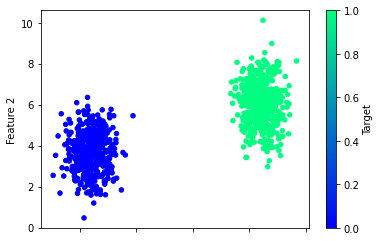

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 633us/sample - loss: 0.6781 - acc: 0.7547
Epoch 2/100
750/750 [==============================] - 0s 86us/sample - loss: 0.6736 - acc: 0.7707
Epoch 3/100
750/750 [==============================] - 0s 78us/sample - loss: 0.6682 - acc: 0.7880
Epoch 4/100
750/750 [==============================] - 0s 88us/sample - loss: 0.6620 - acc: 0.8120
Epoch 5/100
750/750 [==============================] - 0s 72us/sample - loss: 0.6545 - acc: 0.8387
Epoch 6/100
750/750 [==============================] - 0s 86us/sample - loss: 0.6457 - acc: 0.8600
Epoch 7/100
750/750 [==============================] - 0s 100us/sample - loss: 0.6356 - acc: 0.8947
Epoch 8/100
750/750 [==============================] - 0s 77us/sample - loss: 0.6240 - acc: 0.9187
Epoch 9/100
750/750 [==============================] - 0s 158us/sample - loss: 0.6112 - acc: 0.9413
Epoch 10/100
750/750 [==============================] - 0s 176us/sample - loss: 0.5972 - acc: 0.9587
Epoch

750/750 [==============================] - 0s 101us/sample - loss: 0.0995 - acc: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 85us/sample - loss: 0.0979 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 77us/sample - loss: 0.0962 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 82us/sample - loss: 0.0946 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 90us/sample - loss: 0.0931 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 80us/sample - loss: 0.0916 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 72us/sample - loss: 0.0901 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 88us/sample - loss: 0.0886 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 76us/sample - loss: 0.0872 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 88us/sample - loss: 0.0858 - acc: 1.0000
Epoch 91/100

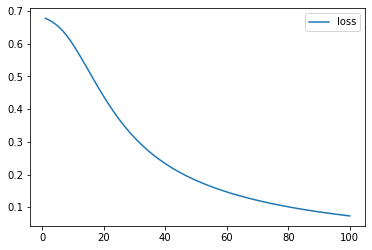

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

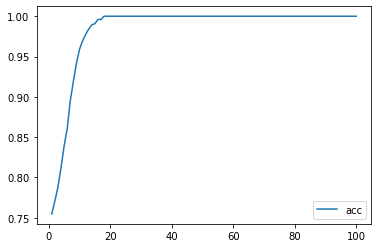

In [12]:
# Plot the accuracy
history_df.plot(y="acc")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0690 - acc: 1.0000
Loss: 0.06899164009094239, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])